# 2 Cat and Dog Image Classifier

## 2.1 Problem Description

<p>The content below is copied from FCC Google Colab link:</p>

<p><a href="https://colab.research.google.com/github/freeCodeCamp/boilerplate-cat-and-dog-image-classifier/blob/master/fcc_cat_dog.ipynb">https://colab.research.google.com/github/freeCodeCamp/boilerplate-cat-and-dog-image-classifier/blob/master/fcc_cat_dog.ipynb</a></p>

<p>For this challenge, you will complete the code  to classify images of dogs and cats. You will use Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)</p>

<p>Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.</p>

<p>The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.</p>

<p>The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):</p>

<pre class="language-py" tabindex="0"><code class="language-py">cats_and_dogs
<span class="token operator">|</span>__ train<span class="token punctuation">:</span>
    <span class="token operator">|</span>______ cats<span class="token punctuation">:</span> <span class="token punctuation">[</span>cat<span class="token punctuation">.</span><span class="token number">0</span><span class="token punctuation">.</span>jpg<span class="token punctuation">,</span> cat<span class="token punctuation">.</span><span class="token number">1</span><span class="token punctuation">.</span>jpg <span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">]</span>
    <span class="token operator">|</span>______ dogs<span class="token punctuation">:</span> <span class="token punctuation">[</span>dog<span class="token punctuation">.</span><span class="token number">0</span><span class="token punctuation">.</span>jpg<span class="token punctuation">,</span> dog<span class="token punctuation">.</span><span class="token number">1</span><span class="token punctuation">.</span>jpg <span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">]</span>
<span class="token operator">|</span>__ validation<span class="token punctuation">:</span>
    <span class="token operator">|</span>______ cats<span class="token punctuation">:</span> <span class="token punctuation">[</span>cat<span class="token punctuation">.</span><span class="token number">2000</span><span class="token punctuation">.</span>jpg<span class="token punctuation">,</span> cat<span class="token punctuation">.</span><span class="token number">2001</span><span class="token punctuation">.</span>jpg <span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">]</span>
    <span class="token operator">|</span>______ dogs<span class="token punctuation">:</span> <span class="token punctuation">[</span>dog<span class="token punctuation">.</span><span class="token number">2000</span><span class="token punctuation">.</span>jpg<span class="token punctuation">,</span> dog<span class="token punctuation">.</span><span class="token number">2001</span><span class="token punctuation">.</span>jpg <span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">]</span>
<span class="token operator">|</span>__ test<span class="token punctuation">:</span> <span class="token punctuation">[</span><span class="token number">1</span><span class="token punctuation">.</span>jpg<span class="token punctuation">,</span> <span class="token number">2</span><span class="token punctuation">.</span>jpg <span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">.</span><span class="token punctuation">]</span>
</code></pre>

<p>You can tweak epochs and batch size if you like, but it is not required.</p>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2.1.1 Download and Setting Data Set

In [3]:
# Get project files
!apt-get update -qq && apt-get install -y -qq wget unzip
!rm -rf cats_and_dogs.zip && rm -rf cats_and_dogs
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!ls -lah
!unzip -o cats_and_dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [4]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

<p>Now it is your turn! Set each of the variables below correctly. (They should no
longer equal <code>None</code>.)</p>

<p>Create image generators for each of the three image data sets (train,
validation, test). Use <code>ImageDataGenerator</code> to read / decode the images and
convert them into floating point tensors. Use the <code>rescale</code> argument (and no
other arguments for now) to rescale the tensors from values between 0 and 255 to
values between 0 and 1.</p>

<p>For the <code>*_data_gen</code> variables, use the <code>flow_from_directory</code> method. Pass in
the batch size, directory, target size (<code>(IMG_HEIGHT, IMG_WIDTH)</code>), class mode,
and anything else required. <code>test_data_gen</code> will be the trickiest one.
For <code>test_data_gen</code>, make sure to pass in <code>shuffle=False</code> to
the <code>flow_from_directory</code> method. This will make sure the final predictions stay
is in the order that our test expects. For <code>test_data_gen</code> it will also be
helpful to observe the directory structure.</p>

<p>After you run the code, the output should look like this:</p>

<pre><code>Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.</code></pre>

In [5]:
rescale=1/255

train_image_generator = ImageDataGenerator(rescale=rescale)
validation_image_generator = ImageDataGenerator(rescale=rescale)
test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    classes=["."], # this is the trick bit
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


<p>The <code>plotImages</code> function will be used a few times to plot images. It takes an
array of images, and a probabilities list, although the probabilities list is
optional. This code is given to you. If you created the <code>train_data_gen</code>
variable correctly, then running the cell below will plot five random training
images.</p>

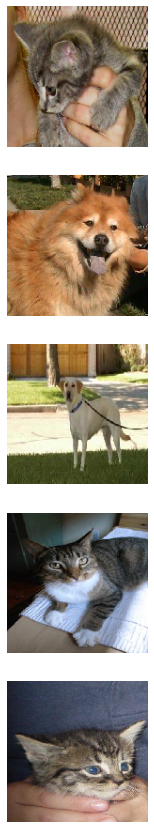

In [7]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

<p>Recreate the <code>train_image_generator</code> using <code>ImageDataGenerator</code>.</p>

<p>Since there are a few training examples there is a risk of
overfitting. One way to fix this problem is by creating more training data from
existing training examples by using random transformations.</p>

<p>Add 4-6 random transformations as arguments to <code>ImageDataGenerator</code>. Make sure
to rescale the same as before.</p>

In [8]:
train_image_generator = ImageDataGenerator(
    rescale=rescale,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)

<p>You don't have to do anything for the next cell. <code>train_data_gen</code> is created
just like before but with the new <code>train_image_generator</code>. Then, a single image
is plotted five different times using different variations.</p>

Found 2000 images belonging to 2 classes.


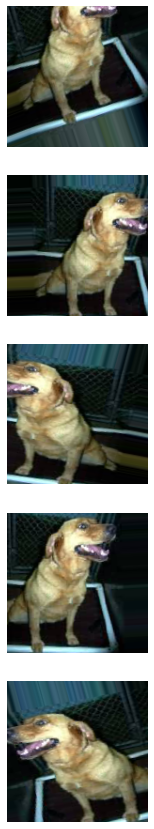

In [9]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

<p>In the cell below, create a model for the neural network that outputs class
probabilities. It should use the Keras Sequential model. It will probably
involve a stack of Conv2D and MaxPooling2D layers and then a fully connected
layer on top that is activated by a ReLU activation function.</p>

<p>Compile the model passing the arguments to set the optimizer and loss. Also pass
in <code>metrics=['accuracy']</code> to view training and validation accuracy for each
training epoch.</p>

In [10]:
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [11]:
from math import ceil
steps_per_epoch=ceil(len(train_data_gen) / batch_size)
steps_per_epoch

1

In [12]:
validation_steps = ceil(len(val_data_gen) / batch_size)
validation_steps

1

<p>Use the <code>fit</code> method on your <code>model</code> to train the network. Make sure to pass in
arguments for <code>x</code>, <code>steps_per_epoch</code>, <code>epochs</code>, <code>validation_data</code>,
and <code>validation_steps</code>.</p>

In [13]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/15
16/16 [==============================] - 59s 4s/step - loss: 0.8318 - accuracy: 0.5030 - val_loss: 0.6892 - val_accuracy: 0.5040
Epoch 2/15
16/16 [==============================] - 57s 4s/step - loss: 0.6915 - accuracy: 0.5235 - val_loss: 0.6856 - val_accuracy: 0.5880
Epoch 3/15
16/16 [==============================] - 56s 3s/step - loss: 0.6769 - accuracy: 0.5400 - val_loss: 0.6588 - val_accuracy: 0.6030
Epoch 4/15
16/16 [==============================] - 56s 3s/step - loss: 0.6790 - accuracy: 0.5715 - val_loss: 0.6865 - val_accuracy: 0.5370
Epoch 5/15
16/16 [==============================] - 56s 3s/step - loss: 0.6872 - accuracy: 0.5460 - val_loss: 0.6664 - val_accuracy: 0.5920
Epoch 6/15
16/16 [==============================] - 56s 3s/step - loss: 0.6779 - accuracy: 0.5640 - val_loss: 0.6614 - val_accuracy: 0.5870
Epoch 7/15
16/16 [==============================] - 56s 3s/step - loss: 0.6664 - accuracy: 0.5825 - val_loss: 0.6400 - val_accuracy: 0.6250
Epoch 8/15
16/16 [==

<p>Run the next cell to visualize the accuracy and loss of the model.</p>

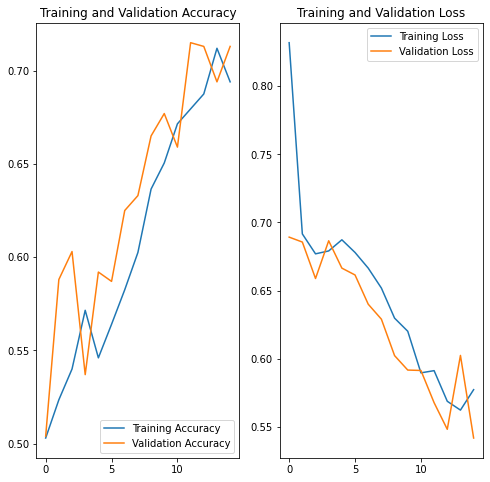

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<p>Now it is time to use your model to predict whether a brand-new image is a cat
or a dog.</p>

<p>In this final cell, get the probability that each test image (
from <code>test_data_gen</code>) is a dog or a cat. <code>probabilities</code> should be a list of
integers.</p>

<p>Call the <code>plotImages</code> function and pass in the test images and the probabilities
corresponding to each test image.</p>

<p>After your run the cell, you should see all 50 test images with a label showing
the percentage sure that the image is a cat or a dog. The accuracy will
correspond to the accuracy shown in the graph above (after running the previous
cell). More training images could lead to a higher accuracy.</p>

In [15]:
predictions = model.predict(test_data_gen)
probabilities = [1 if a[0]<a[1] else 0 for a in predictions]
# probabilities

In [16]:
print(len(probabilities))

50


<p>Run this final cell to see if you passed the challenge or if you need to keep
trying.</p>

In [17]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print( f"Your model correctly identified {round(percentage_identified*100, 2)}% "
       f"of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% "
        "of the images. Keep trying. You will get it!")

Your model correctly identified 78.0% of the images of cats and dogs.
You passed the challenge!
